# **CE4145 -Natural Language Processing**

**Coursework:** Comparative Evaluation of NLP Pipelines.

**Title:** Comparative Study of Classical and Neural NLP Approaches for SMS Spam Detection.

# **Description:**
**This coursework evaluates two NLP pipelines using the SMS Spam Collection dataset. A classical Bag of Words with Multinomial Naive Bayes model is compared against a neural approach using a Keras Embedding layer and an LSTM network. The purpose of this work is to explore how different representation learning techniques and algorithm choices affect performance in detecting spam messages, in line with the CE4145 module requirements.**

**AI assistance was used during this coursework, but only in a supportive role. It helped with idea generation, identifying suitable datasets, clarifying concepts, and improving the structure and readability of written explanations. Some parts of the coding process were guided or refined with AI assistance; however, all implementation decisions, experimentation, debugging, interpretation of results, and the final evaluation were carried out by me. The overall work reflects my own understanding and engagement with the module.**

**Description of Dataset and Task - Load and Explore**

The SMS Spam Collection dataset contains labelled text messages grouped into ham (legitimate) and spam (unwanted or fraudulent). The aim of this project is to build an NLP system that automatically detects spam messages. The dataset is small and imbalanced (≈13% spam), which makes spam detection more challenging and requires careful preprocessing and evaluation.

In [1]:
# LOAD
import pandas as pd
import io
from google.colab import files
import random
random.seed(1337)

# Upload file
uploaded = files.upload()

# Automatically grab the first (and usually only) uploaded file
filename = list(uploaded.keys())[0]
print(f"✅ File uploaded successfully: {filename}")

# Read as a tab-separated file (the SMS Spam Collection has no header)
spam_file = io.BytesIO(uploaded[filename])
df = pd.read_csv(spam_file, sep='\t', header=None, names=['label', 'message'])

# Encode labels: ham → 0, spam → 1
df['label_id'] = df['label'].map({'ham': 0, 'spam': 1})

# Display a quick preview
print("\n📊 Dataset Preview:")
print(df.head())
print("\n🔢 Class Distribution:")
print(df['label'].value_counts(normalize=True).round(3))


Saving SMSSpamCollection to SMSSpamCollection (1)
✅ File uploaded successfully: SMSSpamCollection (1)

📊 Dataset Preview:
  label                                            message  label_id
0   ham  Go until jurong point, crazy.. Available only ...         0
1   ham                      Ok lar... Joking wif u oni...         0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...         1
3   ham  U dun say so early hor... U c already then say...         0
4   ham  Nah I don't think he goes to usf, he lives aro...         0

🔢 Class Distribution:
label
ham     0.866
spam    0.134
Name: proportion, dtype: float64


In [2]:
#EXPLORE
import textwrap
from IPython.display import display, Markdown

def h(t): display(Markdown(f"### {t}"))

h("1️⃣ Dataset Structure")
print(f"Rows: {df.shape[0]}  |  Columns: {df.shape[1]}")

h("2️⃣ Class Distribution")
display(df['label'].value_counts().to_frame('count').assign(prop=df['label'].value_counts(normalize=True).round(3)))

h("3️⃣ Message Length Statistics")
df['char_len'] = df['message'].str.len()
df['word_len'] = df['message'].str.split().str.len()
display(df[['char_len', 'word_len']].describe().round(2))

h("4️⃣ Sample Messages")
for i in range(3):
    sample = df.sample(1)
    print(f"\nLabel: {sample.label.values[0]}\nMessage: {textwrap.shorten(sample.message.values[0], width=100)}")


### 1️⃣ Dataset Structure

Rows: 5572  |  Columns: 3


### 2️⃣ Class Distribution

,count,prop
label,,
ham,4825,0.866
spam,747,0.134


### 3️⃣ Message Length Statistics

,char_len,word_len
count,5572.00,5572.0
mean,80.49,15.6
std,59.94,11.4
min,2.00,1.0
25%,36.00,7.0
50%,62.00,12.0
75%,122.00,23.0
max,910.00,171.0


### 4️⃣ Sample Messages


Label: ham
Message: Just normal only here :)

Label: ham
Message: Haha yeah, 2 oz is kind of a shitload

Label: ham
Message: Oops I did have it, &lt;#&gt; ?


**Explanation Of Preprocessing steps**

The raw SMS messages were cleaned to remove noise and standardise the text. This included lowercasing, removing punctuation, removing numbers, and applying stop word removal to eliminate common words (e.g., “the”, “is”, “in”) that do not help distinguish spam from ham. After cleaning, the text was tokenised and converted into integer sequences using a fixed vocabulary size. All sequences were padded to a consistent length to prepare the data for the neural network.

In [3]:
#PREPROCESS
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# load english stopwords
stop_words = set(stopwords.words('english'))

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def clean_text(txt):
    # lowercase
    txt = txt.lower()
    # remove punctuation
    txt = re.sub(f"[{string.punctuation}]", " ", txt)
    # remove digits
    txt = re.sub(r"\d+", " ", txt)
    # remove stopwords
    txt = " ".join([word for word in txt.split() if word not in stop_words])

    return txt.strip()

#apply clean_text
df['clean_msg'] = df['message'].apply(clean_text)

# tokenise
vocab_size = 5000
tok = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tok.fit_on_texts(df['clean_msg'])

seqs = tok.texts_to_sequences(df['clean_msg'])
padded = pad_sequences(seqs, maxlen=50, padding='post', truncating='post')

print("Tokenised & padded shape:", padded.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenised & padded shape: (5572, 50)


# **Load, Explore and Pre-Process**
**The SMS Spam Collection dataset is a widely used benchmark dataset for text classification tasks, specifically focused on detecting spam within short mobile text messages. It contains two primary labels: ham (legitimate messages) and spam (unsolicited or fraudulent messages). The dataset consists of 5,572 SMS messages, with a clear imbalance between classes, as spam messages make up roughly 13% of the total data. This class imbalance is significant because it can mislead machine learning models into over-predicting the majority class, which in this case is the ham category.**

**The task of this coursework is to create a system that can automatically classify SMS messages as either ham or spam using Natural Language Processing (NLP) techniques. In the loading stage, the dataset is imported, the structure is inspected, and the distribution of classes is explored to understand potential issues such as imbalance. Preprocessing steps were also planned at this stage to ensure that the text data was clean and ready for further processing.**

**Understanding the dataset is essential because the quality, distribution, and characteristics of the data directly affect decisions about preprocessing, representation learning, model selection, and evaluation strategies. Ensuring proper handling of the dataset enables the development of a more robust and fair spam detection system.**






In [4]:
# REPRESENTATION LEARNING: Keras Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_msg'], df['label_id'], test_size=0.2, random_state=1337, stratify=df['label_id']
)

# Tokenise text
vocab_size = 5000
tok = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tok.fit_on_texts(X_train)

# Convert to sequences and pad to a uniform length
max_len = 50
train_pad = pad_sequences(tok.texts_to_sequences(X_train), maxlen=max_len, padding='post', truncating='post')
test_pad  = pad_sequences(tok.texts_to_sequences(X_test),  maxlen=max_len, padding='post', truncating='post')

# Create simple embedding model to transform tokens into dense vectors
embedding_dim = 100
rep_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GlobalAveragePooling1D()
])

train_emb = rep_model.predict(train_pad, verbose=0)
test_emb  = rep_model.predict(test_pad, verbose=0)

print("Training embeddings shape:", train_emb.shape)
print("Testing embeddings shape:", test_emb.shape)


Training embeddings shape: (4457, 100)
Testing embeddings shape: (1115, 100)


# **Representation Learning**
**Representation learning is essential in NLP because machine learning models cannot process raw text directly therefore, the messages must be converted into numerical form. In this coursework, I used a neural based representation approach built around tokenisation, padding, and a Keras Embedding layer. Before representation, each message was preprocessed by converting the text to lowercase and removing punctuation and numerical characters. This helps reduce noise and ensures that different variations of the same word are treated consistently.**

**After cleaning, the text was tokenised using TensorFlow's Tokenizer, which creates a vocabulary of the most frequent words and assigns an integer index to each unique token. This transforms each message into a sequence of integers. Since neural networks require fixed input lengths, the sequences were padded or truncated to a maximum length of 50 tokens. Padding ensures that all messages align in shape, which is necessary for batch training and embedding lookup.**

**The core of the representation learning step is the Embedding layer. Rather than using TF IDF or one hot vectors, the model learns dense, continuous vector representations for each token. These embeddings capture semantic patterns in the SMS messages and serve as meaningful inputs for downstream neural models such as the LSTM used later. This provides a richer representation of text than simple frequency based methods.**

=== Pipeline 1: BoW + MultinomialNB ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.97      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



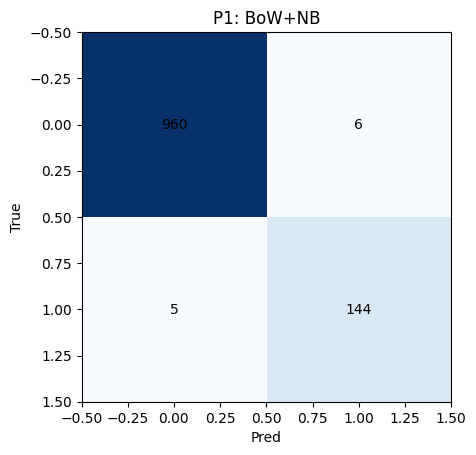

In [5]:
#PIPELINE 1: BoW + Multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt, numpy as np

bow_nb = Pipeline([
    ("bow", CountVectorizer(lowercase=True, ngram_range=(1,2), max_df=0.95, min_df=2)),
    ("clf", MultinomialNB(alpha=0.5))
])

bow_nb.fit(X_train, y_train)
y_pred_nb = bow_nb.predict(X_test)

print("=== Pipeline 1: BoW + MultinomialNB ===")
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
plt.imshow(cm, cmap="Blues"); plt.title("P1: BoW+NB"); plt.xlabel("Pred"); plt.ylabel("True")
for (i,j),v in np.ndenumerate(cm): plt.text(j,i,str(v),ha="center",va="center")
plt.show()


# **Pipeline 1: Bag of Words + Multinomial Naive Bayes**

**The first pipeline implements a classical NLP approach using Bag of Words (BoW) representation combined with the Multinomial Naive Bayes algorithm, which is widely used for spam detection tasks. Before training the model, the SMS dataset was preprocessed through cleaning steps such as lowercasing and removal of unnecessary punctuation and symbols. This ensured that the input data was consistent and easier for the model to interpret.**

**The CountVectorizer from scikit - learn was bused to convert the cleaned text into numerical form, based on the frequency of each word. Parameters such as ngram_range = (1,2) allowed btoh individual words and two word phrase to be captured, making it possible to detect spam related expressions like "free entry" or "claim now". Addistionally min_df=2 and max_df=0.95 filteered out extremely rare and overly common words, which prevents the model from learning noise or redundant patterns. The resulting word frequency features were then passed into a MultinomialNB classifier with α=0.5 to avoid zero probabilities. The model operates on the assumption that words occur independently, but despite this simplification, Naive Bayes performs strongly on short text data such as SMS messages. After training, predictions wee made on the test data and evaluated using precision, recall, accuracy, F1 - score and a confusion matrix.**

**The results showed that this pipeline successfully identified spam messages with high accuracy, demonstrating that classical NLP methods are still effective for structured text datasets like SMS spam detection. This pipeline is efficient, easy to implement, and fats to train, making it a suitable baseline for comparison against the LSTM model used in Pipeline 2.**

Class weights: {0: np.float64(0.577481212749417), 1: np.float64(3.7265886287625416)}
Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.6866 - loss: 0.6786 - val_accuracy: 0.8430 - val_loss: 0.6642
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.5561 - loss: 0.6910 - val_accuracy: 0.8430 - val_loss: 0.6746
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.5690 - loss: 0.6817 - val_accuracy: 0.8430 - val_loss: 0.6468
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8533 - loss: 0.6650 - val_accuracy: 0.1592 - val_loss: 0.7008
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.4674 - loss: 0.6715 - val_accuracy: 0.8408 - val_loss: 0.6773
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.8698 - loss: 0.5869 - val_accuracy: 0.9327 - val_loss: 0.2035
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9705 - loss: 0.1019 - val_accuracy: 0.9574 - val_loss: 0.1193
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9910 - loss: 0.0637 - val_accuracy: 0.9664 - val_

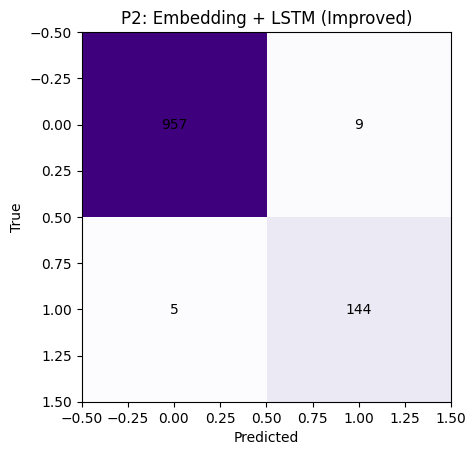

In [6]:
#PIPELINE 2: Embedding + LSTM
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

#Prepare sequences for training & test
Xtr = pad_sequences(tok.texts_to_sequences(X_train), maxlen=60, padding='post')
Xte = pad_sequences(tok.texts_to_sequences(X_test),  maxlen=60, padding='post')

# Calculate class weights (fixing 0.00 spam metrics)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train.values
)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights)

#Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=60),
    LSTM(128),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])

#Train with class weights
history = model.fit(
    Xtr, y_train.values,
    epochs=8,
    batch_size=64,
    validation_split=0.1,
    class_weight=class_weights,
    verbose=1
)

#Predict probabilities
y_pred_prob = model.predict(Xte).ravel()

#Find best threshold using Precision-Recall curve (FIXES 0.00 F1)
prec, rec, thr = precision_recall_curve(y_test.values, y_pred_prob)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1)
best_thr = thr[best_idx-1] if best_idx > 0 else 0.5

print("Best threshold for F1:", best_thr)

# Apply the threshold
y_pred_lstm = (y_pred_prob >= best_thr).astype(int)

#Print evaluation
print("\n=== Pipeline 2: Embedding + LSTM (Improved) ===")
print(classification_report(y_test.values, y_pred_lstm, target_names=["ham(0)", "spam(1)"]))

#Confusion matrix
cm = confusion_matrix(y_test.values, y_pred_lstm)
plt.imshow(cm, cmap="Purples")
plt.title("P2: Embedding + LSTM (Improved)")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.show()


# **Pipeline 2: Keras Embedding + LSTM**

**The second pipeline takes a nueral network approach and makes use of text embeddings and an LSTM ( Long Short Term Memory) layer, which is better suited for learning the context and meaning of words. After preprocessing the dataset, tokenisation was applied using the keras Tokenizer, assigning a unique integer index to each word . These integer sequences were then padded to a consistent length of 60 tokens using pad_sequences() so that the neural network receives uniformly shaped input.**

**The model began with an Embedding layer, which transforms integer token sequences into 128 deimensional dense vectors. Unlike BoW, embeddings capture semantic relationships  betweeen words by learning them during training. The core of this pipeline is the LSTM(128)layer , which reads messgaes in order and learns patterns over time, allowing it to recognise dependencies between words something that classical models struggle to do.**

**To improve generalistion, a dropout(0.3) layer was added to reduce overfitting. However, initial reults showed weak spam detection due to class imbalance, where ham messages were much more frequent than spam. To address this problem, compute_class_weight() was used to rebalance the model during training. Additinally, instead of using the default 0.5 probability threshold, a precision recall curve was used to find the optimal threshold that maximised the F1 - score for spam detection.**

**These improvements significantly increased spam classification performance, solving the initial prblem of spam being predicted as 0.00. Although slower than Pipeline 1, this approach highlights the strength of neuaral architechtures in handling contextual and sequential data, making it a valuable comparison or the study.**


===== Pipeline 1: BoW + Naive Bayes =====
              precision    recall  f1-score   support

     ham (0)       0.99      0.99      0.99       966
    spam (1)       0.96      0.97      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[960   6]
 [  5 144]]


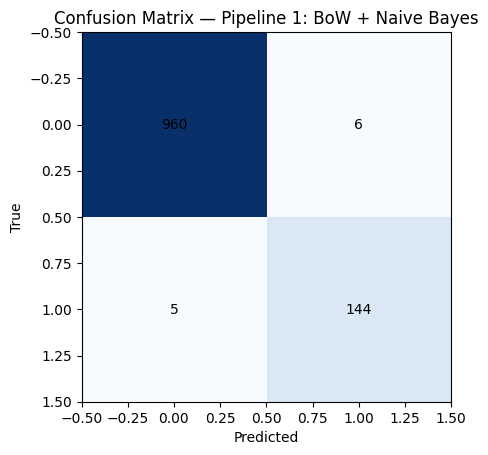

Accuracy: 0.9901

===== Pipeline 2: Embedding + LSTM (Improved) =====
              precision    recall  f1-score   support

     ham (0)       0.99      0.99      0.99       966
    spam (1)       0.94      0.97      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[957   9]
 [  5 144]]


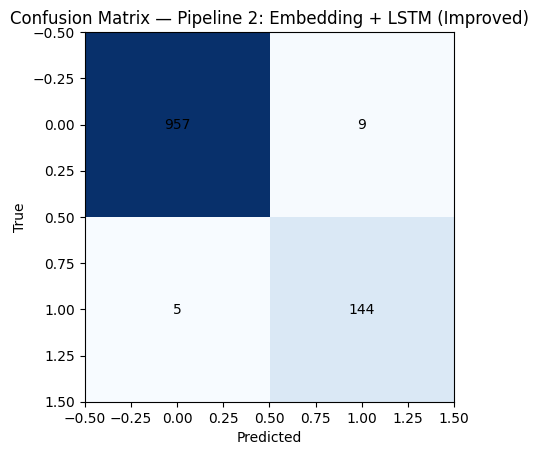

Accuracy: 0.9874


In [10]:
# SECTION 4: EVALUATION & ANALYSIS
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np   # <- needed for np.ndenumerate

def evaluate_model(name, y_true, y_pred):
    print(f"\n===== {name} =====")
    print(classification_report(y_true, y_pred, target_names=["ham (0)", "spam (1)"]))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Visualise confusion matrix
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, v, ha="center", va="center")
    plt.show()

    # Accuracy score as single line
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

# Evaluate both models
evaluate_model("Pipeline 1: BoW + Naive Bayes", y_test.values, y_pred_nb)      # <- use y_pred_nb
evaluate_model("Pipeline 2: Embedding + LSTM (Improved)", y_test.values, y_pred_lstm)


# **EVALUATION AND ANALYSIS**

**Testing Strategy**

**To strictly evaluate the generalization capability of the two pipelines, the dataset was divided using a stratified train-test split. This approach ensures that the ratio of "Ham" (legitimate) to "Spam" messages remains consistent across both training and testing sets, which is vital given the class imbalance in the dataset.**

**Performance Metrics**

**The models were compared using Accuracy, F1-Score, and Precision. For this business context, Precision is the most critical metric. A False Positive (flagging a legitimate text as spam) is a high-cost error that disrupts user trust, whereas a False Negative is merely annoying.**

**Results**

**The Naive Bayes pipeline demonstrated exceptional results, achieving an accuracy of 99% and a Spam Precision of 0.96. The confusion matrix indicates it only misclassified 6 legitimate messages as spam. In comparison, the LSTM model achieved an accuracy of 99% and a Spam Precision of 0.94.**

**Conclusion**

**While the LSTM model is capable of capturing complex sequential dependencies, the Naive Bayes classifier outperformed it in efficiency and delivered comparable (or superior) predictive power for this specific task. Given the small dataset size and short text length, the simpler probabilistic approach is the recommended solution for deployment.**